In [130]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from preprocessing import *
from affichage import *

In [126]:
lemmatizing_tokenizer_v2("gonna") #see english contractions list

['gon', 'na']

In [129]:
stemming_tokenizer("gonna")

['gon', 'na']

In [92]:
#corpus = ["He was jumping with his inhalers."]  #a very meaningful sentence
#corpus = [transformer_ligne(l) for l in corpus]

In [94]:
path = "data/1___Lost/01"
corpus = get_corpus(path)

In [95]:
#definition de l'ensemble de stopwords
nltk_sw = set(stopwords.words('english'))
sklearn_sw = set(stop_words.ENGLISH_STOP_WORDS)
stopwords_set = nltk_sw | sklearn_sw
l_nb = [str(i) for i in range(1000000)]
l_mots = ["don", "yeah", "hey", "okay", "oh", "uh", "yes", "ok"]
for mot in l_mots :
    stopwords_set.add(mot)
for nb in l_nb:
    stopwords_set.add(nb)

In [99]:
vectorizer = CountVectorizer(stop_words = stopwords_set, tokenizer=lemmatizing_tokenizer_v2)
X = vectorizer.fit_transform(corpus)
nb_occ_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
nb_occ_df.head()

,00,000,104th,15th,17th,23a,23c,24l7,24th,5am,...,yokel,york,young,yum,yup,z,zahraa,zipper,zombie,â
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [100]:
vectorizer = TfidfVectorizer(stop_words = stopwords_set, tokenizer=lemmatizing_tokenizer_v2)
X = vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
tfidf_df.head()

,00,000,104th,15th,17th,23a,23c,24l7,24th,5am,...,yokel,york,young,yum,yup,z,zahraa,zipper,zombie,â
0,0.0,0.024811,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.036387,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.072774,0.0,0.0,0.0,0.0,0.0
2,0.0,0.035481,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.027352,0.027352,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.029207,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [102]:
nlargest = 20
order = np.argsort(-results.values, axis=1)[:, :nlargest]
result = pd.DataFrame(tfidf_df.columns[order], 
                      columns=['top{}'.format(i) for i in range(1, nlargest+1)],
                      index=tfidf_df.index)
result.head(10)

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12,top13,top14,top15,top16,top17,top18,top19,top20
0,come,help,transceiver,know,pen,good,shaft,right,drive,like,think,na,charlie,cockpit,need,jack,rescue,beth,thing,look
1,come,bear,know,think,battery,iteration,guy,radio,gun,sir,french,seatbelt,polar,fasten,good,say,right,checker,signal,body
2,know,na,gon,wash,away,say,annie,gun,tell,cryin,dinosaur,lord,look,want,kate,dog,dangerous,mortgage,group,walk
3,helen,know,na,boar,locke,gon,tell,think,walkabout,come,say,fish,john,good,talk,rise,randy,norman,destiny,right
4,water,jack,think,na,know,need,come,swim,rent,father,gon,claire,car,say,right,look,latitude,jump,talk,decide
5,know,na,gon,people,guitar,think,look,water,want,talk,like,tell,bee,eve,need,come,man,watch,hive,say
6,charlie,come,jack,antenna,right,know,dig,liam,moth,shaft,want,drive,na,kate,band,bloody,everybody,help,gon,look
7,know,inhaler,sawyer,asthma,want,medicine,peanut,butter,kiss,breathe,david,deal,money,think,na,shannon,tell,right,need,nose
8,alex,nadia,know,danielle,golf,bombing,sayid,come,safe,want,think,jazeem,rash,â,estã,robert,dã³nde,est,people,like
9,know,claire,baby,right,think,thomas,like,want,child,come,tell,lance,raise,psychic,happen,good,mean,manifest,look,need


c:\users\amina\appdata\local\programs\python\python35\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


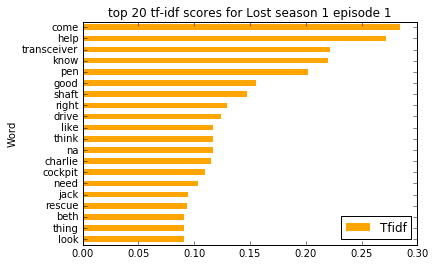

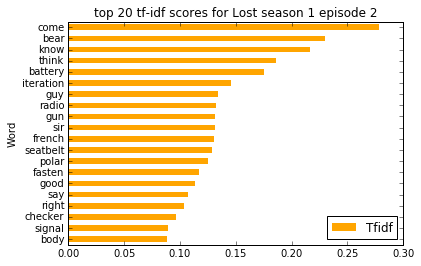

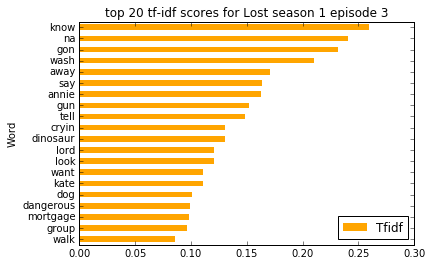

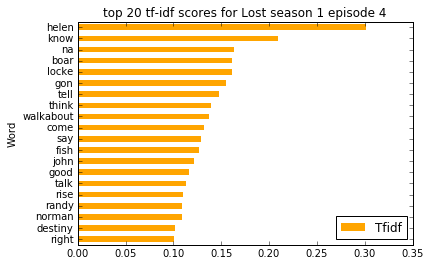

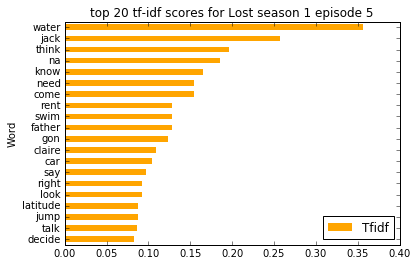

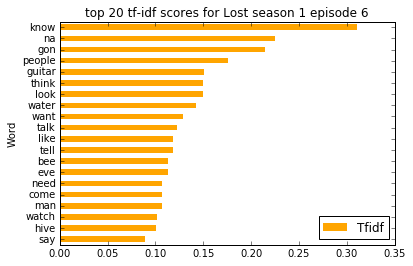

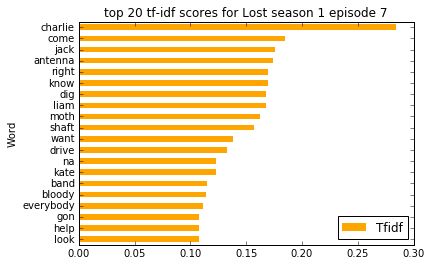

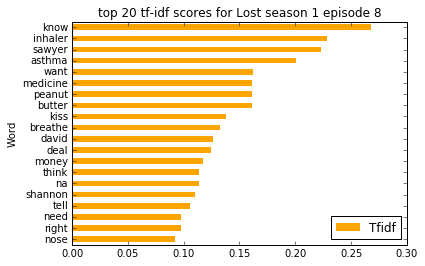

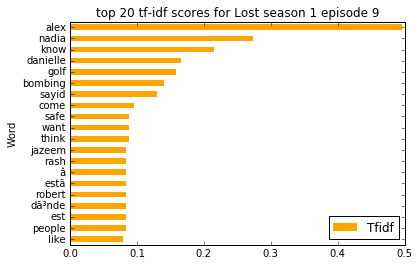

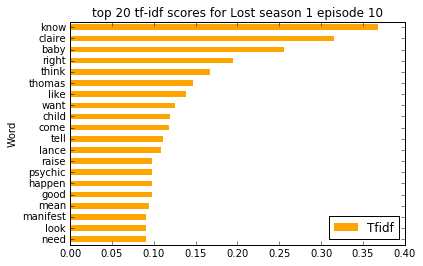

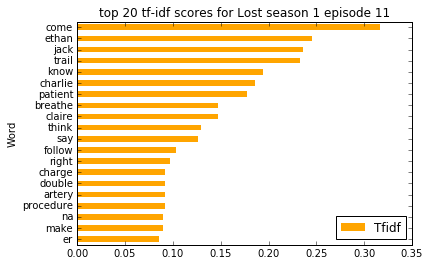

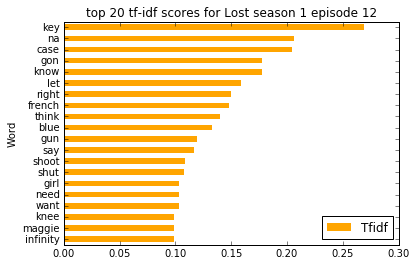

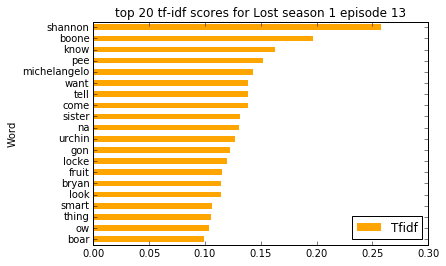

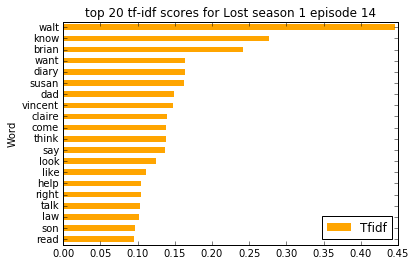

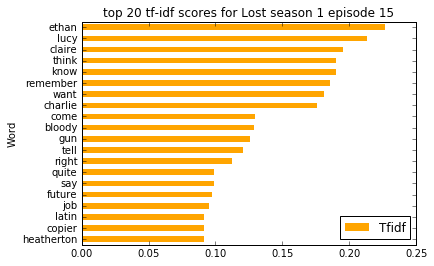

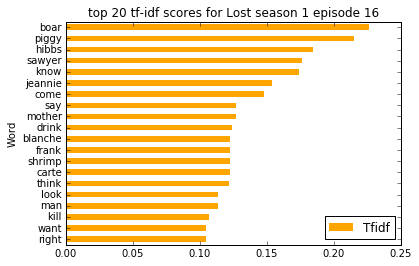

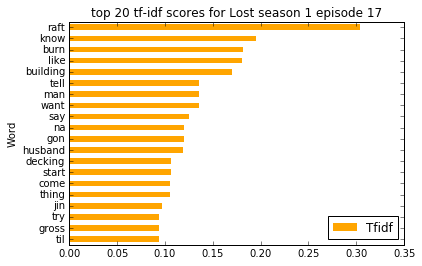

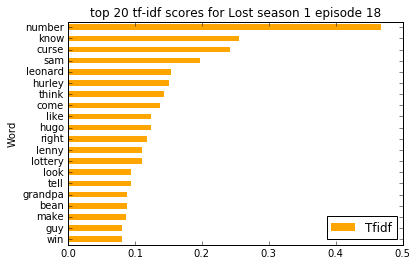

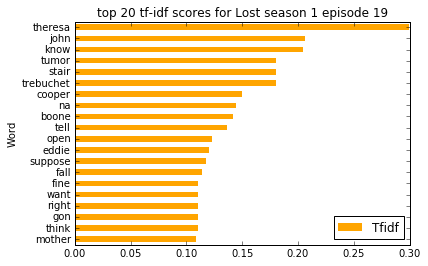

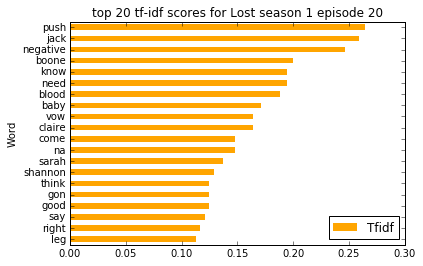

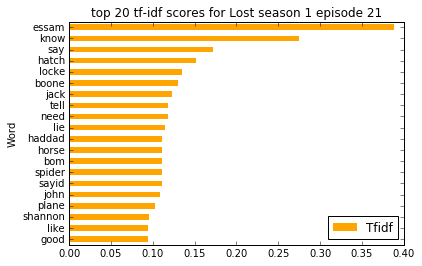

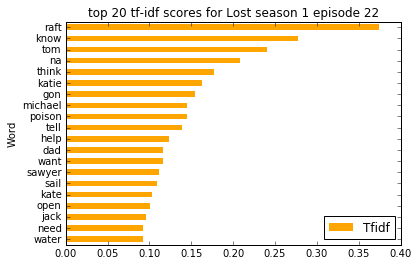

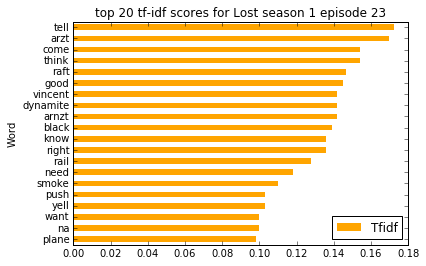

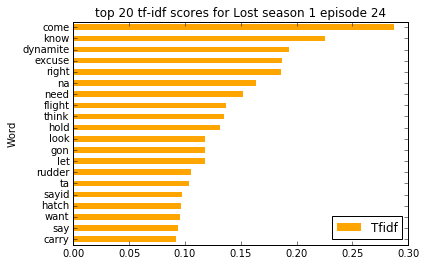

In [108]:
nbep = len(result)
for i in range(nbep):
    lig_df = tfidf_df[i:i+1]
    lig_res = result[i:i+1]

    mots = list(np.array(lig_res)[0])
    values = [float(lig_df[mot]) for mot in mots]
    df = pd.DataFrame(np.column_stack([mots, values]), columns=['Word', 'Tfidf'])
    df.Tfidf = pd.to_numeric(df.Tfidf)
    df.sort_values(by ='Tfidf', inplace = True, ascending=True)
    titre = "top "+str(nlargest)+" tf-idf scores for Lost season 1 episode "+str(i+1)
    get_hist(df, "Word", "Tfidf", titre, "orange", horizontal=True)